In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df=pd.read_csv('./obesity.csv')
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [2]:
# Dropping ID columns because it wont give any information about person 
df=df.drop('ID',axis=1)

## Data preparation

### Missing values

In [3]:
print(df.isnull().sum())

Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


All columns are filled

### Anomalies detection

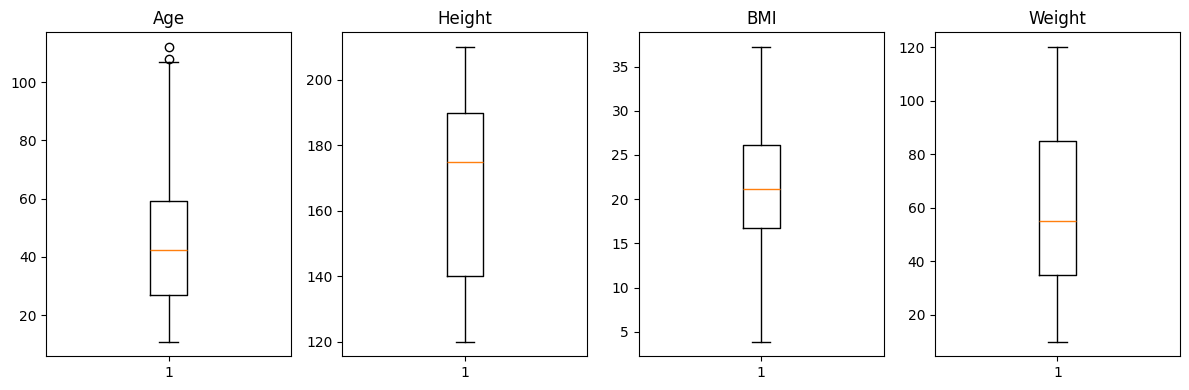

In [4]:
num_cols=['Age','Height','BMI','Weight']
plt.figure(figsize=(12,4))
for ind,col in enumerate(num_cols):
    plt.subplot(1,4,ind+1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Firstly i thought that there is something wrong with older people, like 107 years, 2 meters height, and hundred kilos. But this diversity, may result in good model training. Also older person can have some sort of disease, and at having 93 year, 40 kilos, is considered severely underweight.

### Feature engineering

#### Checking BMI index

I want to check bmi index column, because, thats simple formula, and indexes from dataset can be wrong.
Here is formula, BMI=Weight/Height^2

Sources: 
1) https://www.calculatorsoup.com/calculators/health/bmi-calculator.php
2) https://en.wikipedia.org/wiki/Body_mass_index
3) https://www.everydayhealth.com/obesity/guide/bmi/

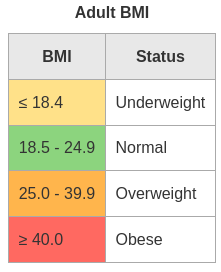
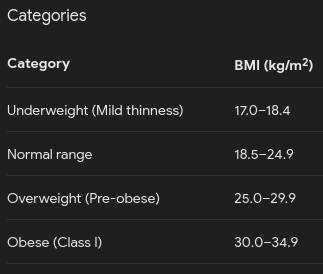
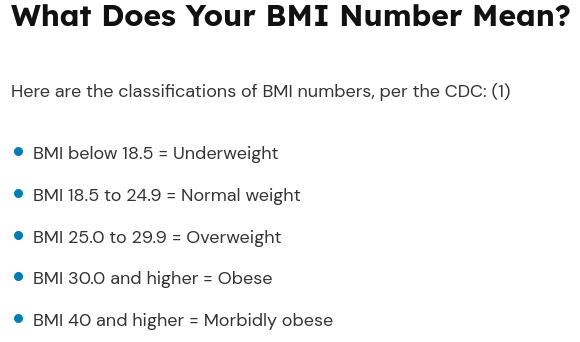

Data that i checked dont cover gender or age, so i think original bmi and labels are reasonable, so i keep them untouched. And below i want compare my version and original

In [5]:
def BMI_calc(index):
    if index<=18.4:
        return 'Underweight'
    elif index>18.4 and index<=24.9:
        return "Normal Weight"
    elif index>24.9 and index<=36.9:
        return 'Overweigth'
    elif index>36.9:
        return 'Obese'
    else:
        return 'Error'

In [6]:
df['Calc_BMI']=df['Weight']/((df['Height']/100)**2)
df['Calc_Label']=df['Calc_BMI'].apply(BMI_calc)

In [7]:
print(len(df[df['Calc_Label']=='Error']))

0


#### Difference in labels

In [8]:
print(f'Not same labels: {(df['Label']!=df['Calc_Label']).sum()}')
print(f'Same labels: {(df['Label']==df['Calc_Label']).sum()}')

Not same labels: 58
Same labels: 50


In [9]:
print(f'Value counts for existed: {df['Label'].value_counts()}{'\n'}')
print(f'Value counts for calculated: {df['Calc_Label'].value_counts()}')

Value counts for existed: Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64

Value counts for calculated: Calc_Label
Underweight      40
Normal Weight    34
Overweigth       24
Obese            10
Name: count, dtype: int64


In [10]:
from sklearn.metrics import accuracy_score
print(f'Accuracy {accuracy_score(df['Label'],df['Calc_Label'])}')

Accuracy 0.46296296296296297


#### Difference between bmi indexes

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f'MAE: {mean_absolute_error(df['BMI'],df['Calc_BMI'])}')
print(f'MSE: {mean_squared_error(df['BMI'],df['Calc_BMI'])}')
print(f'R2: {r2_score(df['BMI'],df['Calc_BMI'])}')

MAE: 5.5654325629169525
MSE: 79.09569503213626
R2: -0.38808799957058726


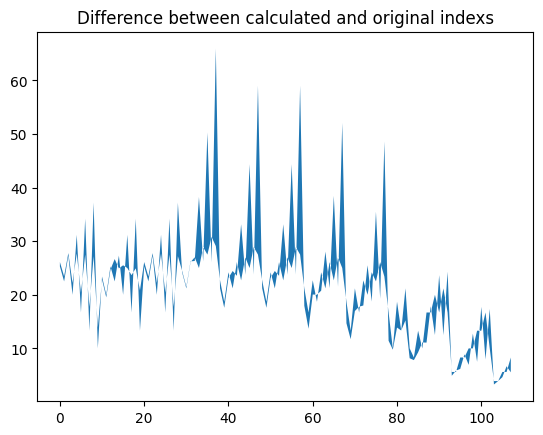

In [12]:
plt.fill_between(range(len(df)),df['BMI'],df['Calc_BMI'])
plt.title('Difference between calculated and original indexs')
plt.show()

In [13]:
df=df.drop(['Calc_Label','Calc_BMI'],axis=1)

In [5]:
df

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight


### Encoding

Only two columns: gender and labels

In [12]:
from sklearn.preprocessing import OrdinalEncoder
df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)
labels_order=['Underweight','Normal Weight','Overweight','Obese']
df['Label']=OrdinalEncoder(categories=[labels_order]).fit_transform(df[['Label']])

In [13]:
df[['Gender','Label']]

,Gender,Label
0,True,1.0
1,False,1.0
2,True,2.0
3,False,0.0
4,True,3.0
...,...,...
103,True,0.0
104,False,0.0
105,True,0.0
106,False,0.0


## Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['Weight']=scaler.fit_transform(df[['Weight']])
df['Age']=scaler.fit_transform(df[['Age']])
df['Height']=scaler.fit_transform(df[['Height']])

In [15]:
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,-0.876032,True,0.303700,0.714053,25.3,1.0
1,2,-0.672829,False,-0.236952,0.017730,22.5,1.0
2,3,-0.469625,True,0.483917,1.062214,27.3,2.0
3,4,-0.266422,False,-0.597387,-0.330431,20.0,0.0
4,5,-0.063219,True,0.844352,1.410375,31.2,3.0
...,...,...,...,...,...,...,...
103,106,-1.445001,True,0.303700,-1.723076,3.9,0.0
104,107,-1.241798,False,-0.236952,-1.723076,3.9,0.0
105,108,-1.038594,True,0.483917,-1.548995,5.6,0.0
106,109,-0.835391,False,-0.597387,-1.548995,5.6,0.0


In [16]:
df['Label']=df['Label'].astype('int')
df['Label']

0      1
1      1
2      2
3      0
4      3
      ..
103    0
104    0
105    0
106    0
107    0
Name: Label, Length: 108, dtype: int64

In [18]:
df=df.drop('ID',axis=1)
df

,Age,Gender,Height,Weight,BMI,Label
0,-0.876032,True,0.303700,0.714053,25.3,1
1,-0.672829,False,-0.236952,0.017730,22.5,1
2,-0.469625,True,0.483917,1.062214,27.3,2
3,-0.266422,False,-0.597387,-0.330431,20.0,0
4,-0.063219,True,0.844352,1.410375,31.2,3
...,...,...,...,...,...,...
103,-1.445001,True,0.303700,-1.723076,3.9,0
104,-1.241798,False,-0.236952,-1.723076,3.9,0
105,-1.038594,True,0.483917,-1.548995,5.6,0
106,-0.835391,False,-0.597387,-1.548995,5.6,0


In [20]:
x_train, x_temp, y_train, y_temp = train_test_split(df.drop(['Label','BMI'], axis=1),df[['Label','BMI']],test_size=0.3,random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp,test_size=0.5,random_state=42)
train_data=pd.concat([x_train,y_train],axis=1)
train_data.to_csv('./datasets/obesity_train_data.csv')
test_data=pd.concat([x_test,y_test],axis=1)
test_data.to_csv('./datasets/obesity_test_data.csv')
val_data=pd.concat([x_val,y_val],axis=1)
val_data.to_csv('./datasets/obesity_val_data.csv')

## Training

Overall creating model for calculating BMI and apointing labels is mostly useless, because its one formula and few if else statements. So i want create two models, one for bmi(regression), other for label(classification). Also i think that gender and age are usefull, like most ranges(from internet) are for adults, and in dataset are some younger persons, also maybe gender kinda influense on bmi and label. And i will use LOOCV, because 108 rows is quite small number for training. After hyperparamter tuning i want compare result from two models with original data.

In [22]:
df=pd.read_csv('./obesity_prep.csv')
df=df.drop('Unnamed: 0',axis=1)
df

,Age,Gender,Height,Weight,BMI,Label
0,-0.876032,True,0.303700,0.714053,25.3,1
1,-0.672829,False,-0.236952,0.017730,22.5,1
2,-0.469625,True,0.483917,1.062214,27.3,2
3,-0.266422,False,-0.597387,-0.330431,20.0,0
4,-0.063219,True,0.844352,1.410375,31.2,3
...,...,...,...,...,...,...
103,-1.445001,True,0.303700,-1.723076,3.9,0
104,-1.241798,False,-0.236952,-1.723076,3.9,0
105,-1.038594,True,0.483917,-1.548995,5.6,0
106,-0.835391,False,-0.597387,-1.548995,5.6,0


#### BMI model

In [46]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut

In [47]:
x=df.drop(['BMI','Label'],axis=1)
y=df['BMI']
poly=PolynomialFeatures(degree=2,include_bias=False)
x_train,x_test,y_train,y_test=train_test_split(df.drop(['BMI','Label'],axis=1),df['BMI'],test_size=0.2,random_state=42)

In [48]:
metrics=[]
loocv=LeaveOneOut()
models={
    'poly reg': LinearRegression(),
    'ridge': Ridge(random_state=42),
    'lasso': Lasso(random_state=42),
    'lin reg': LinearRegression(),
    'decision tree': DecisionTreeRegressor(random_state=42),
    'random forest': RandomForestRegressor(random_state=42),
    'gbr': GradientBoostingRegressor(random_state=42),
    'svr': SVR()
}

In [49]:
for name,model in models.items():
    curr_metrics=[]
    for train_index,test_index in loocv.split(df):
        x_train,x_test=x.iloc[train_index],x.iloc[test_index]
        y_train,y_test=y.iloc[train_index],y.iloc[test_index]
        if name in ['poly reg','ridge','lasso']:
            x_train=poly.fit_transform(x_train)
            x_test=poly.transform(x_test)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        curr_metrics.append({
            'MAE':mean_absolute_error(y_test,pred),
            'MSE':mean_squared_error(y_test,pred),
            'RMSE':np.sqrt(mean_squared_error(y_test,pred))
        })
    curr_metrics=pd.DataFrame(curr_metrics)
    metrics.append({
        'Name': name,
        'MAE':curr_metrics['MAE'].sum()/len(df),
        'MSE':curr_metrics['MSE'].sum()/len(df),
        'RMSE':curr_metrics['RMSE'].sum()/len(df)
    })

In [50]:
metrics=pd.DataFrame(metrics)
metrics

,Name,MAE,MSE,RMSE
0,poly reg,1.132664,2.361552,1.132664
1,ridge,1.146252,2.362481,1.146252
2,lasso,1.597972,4.269209,1.597972
3,lin reg,1.404935,3.054314,1.404935
4,decision tree,0.255556,0.607037,0.255556
5,random forest,0.395694,0.632628,0.395694
6,gbr,0.240335,0.336666,0.240335
7,svr,2.129426,11.517123,2.129426


Gradient boosting look as great choise

#### Hyperparameters tuning (regression)

In [51]:
param_grid = {
    'n_estimators': np.arange(50,301,50),  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': np.arange(1,10,1),
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0]
}
model=GradientBoostingRegressor(random_state=42)
grid=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=4,
    n_jobs=10,
    verbose=1
)
grid.fit(x_train,y_train)

Fitting 4 folds for each of 5832 candidates, totalling 23328 fits


GridSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=10,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300]),
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=1)

In [53]:
best_model=grid.best_estimator_
pred=best_model.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test,pred)}')
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,pred))}')
print(best_model.get_params())

MAE: 0.4225564310634127
MSE: 0.17855393743304862
RMSE: 0.4225564310634127
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.2, 'loss': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 0.6, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


#### Label model

In [54]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import LeaveOneOut

In [55]:
metrics=[]
loocv=LeaveOneOut()
models={
    'log reg': LogisticRegression(random_state=42),
    'sgd': SGDClassifier(random_state=42),
    'svc': SVC(random_state=42),
    'naive bayes': GaussianNB(),
    'k-neight': KNeighborsClassifier(),
    'decision tree': DecisionTreeClassifier(random_state=42),
    'gbr': GradientBoostingClassifier(random_state=42),
    'random forest': RandomForestClassifier(random_state=42)
}
x=df.drop(['BMI','Label'],axis=1)
y=df['Label']

In [57]:
metrics=[]
for name,model in models.items():
    print(f'{name} is training')
    curr_metrics=[]
    for train_index,test_index in loocv.split(x):
        x_train,x_test=x.iloc[train_index],x.iloc[test_index]
        y_train,y_test=y.iloc[train_index],y.iloc[test_index]
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        curr_metrics.append({
            'precision':precision_score(y_test,pred,zero_division=0.0,average='macro'),
            'accuracy': accuracy_score(y_test,pred),
            'recall': recall_score(y_test,pred,average='macro',zero_division=0.0),
            'f1 score': f1_score(y_test,pred,average='macro')
        })
    curr_metrics=pd.DataFrame(curr_metrics) 
    metrics.append({
        'Name': name,
        'precision':curr_metrics['precision'].sum()/len(df),
        'accuracy': curr_metrics['accuracy'].sum()/len(df),
        'recall': curr_metrics['recall'].sum()/len(df),
        'f1 score': curr_metrics['f1 score'].sum()/len(df)
    })
metrics=pd.DataFrame(metrics)
metrics

log reg is training
sgd is training
svc is training
naive bayes is training
k-neight is training
decision tree is training
gbr is training
random forest is training


,Name,precision,accuracy,recall,f1 score
0,log reg,0.805556,0.805556,0.805556,0.805556
1,sgd,0.731481,0.731481,0.731481,0.731481
2,svc,0.833333,0.833333,0.833333,0.833333
3,naive bayes,0.824074,0.824074,0.824074,0.824074
4,k-neight,0.814815,0.814815,0.814815,0.814815
5,decision tree,0.981481,0.981481,0.981481,0.981481
6,gbr,1.000000,1.000000,1.000000,1.000000
7,random forest,0.953704,0.953704,0.953704,0.953704


* decision tree,gbr, random forest are overfitted
* sgd have worst from selected model metrics, but overall pretty good
* log reg, svc, naive bayes, k-neight have around 80%, but i want choose k-neighboors, because its easy fast algorithm, that work well on small datasets

#### Hyperparamter tuning (classification)

In [61]:
from sklearn.model_selection import GridSearchCV
loocv=LeaveOneOut()
model=KNeighborsClassifier()
param_grid={
    'n_neighbors': np.arange(1,31,2),
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan','chebyshev'],
    'p': [1,2]
}
grid=GridSearchCV(
    estimator=model,
    cv=loocv,
    param_grid=param_grid,
    n_jobs=10,
    verbose=1
)
grid.fit(x_train,y_train)

Fitting 107 folds for each of 180 candidates, totalling 19260 fits


GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(), n_jobs=10,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=1)

In [63]:
best_model=grid.best_estimator_
metrics=[]
for train_index,test_index in loocv.split(x):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    pred=best_model.predict(x_test)
    metrics.append({
        'Accuracy':accuracy_score(y_test,pred),
        'Precision': precision_score(y_test,pred,average='macro',zero_division=0.0),
        'Recall': recall_score(y_test,pred,average='macro',zero_division=0.0),
        'F1 score': f1_score(y_test,pred,average='macro')
    })
metrics=pd.DataFrame(metrics)
metrics=metrics.sum()/108
metrics.to_frame()

,0
Accuracy,0.87963
Precision,0.87963
Recall,0.87963
F1 score,0.87963


In [64]:
best_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 1,
 'weights': 'uniform'}